#Feynn Lab First Project On Fertilizer Recomendation System

##Impoort Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
df=pd.read_csv("Fertilizer Prediction.csv")
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


## Simple EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


##Information About Dataset

In [5]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


##Histrogram Plot Of Various Attribute With Their Counts

In [6]:
Numeric_column=["Temparature", "Humidity ", "Moisture", "Nitrogen", "Phosphorous"]
Catagorical_column=["Soil Type", "Crop Type"]

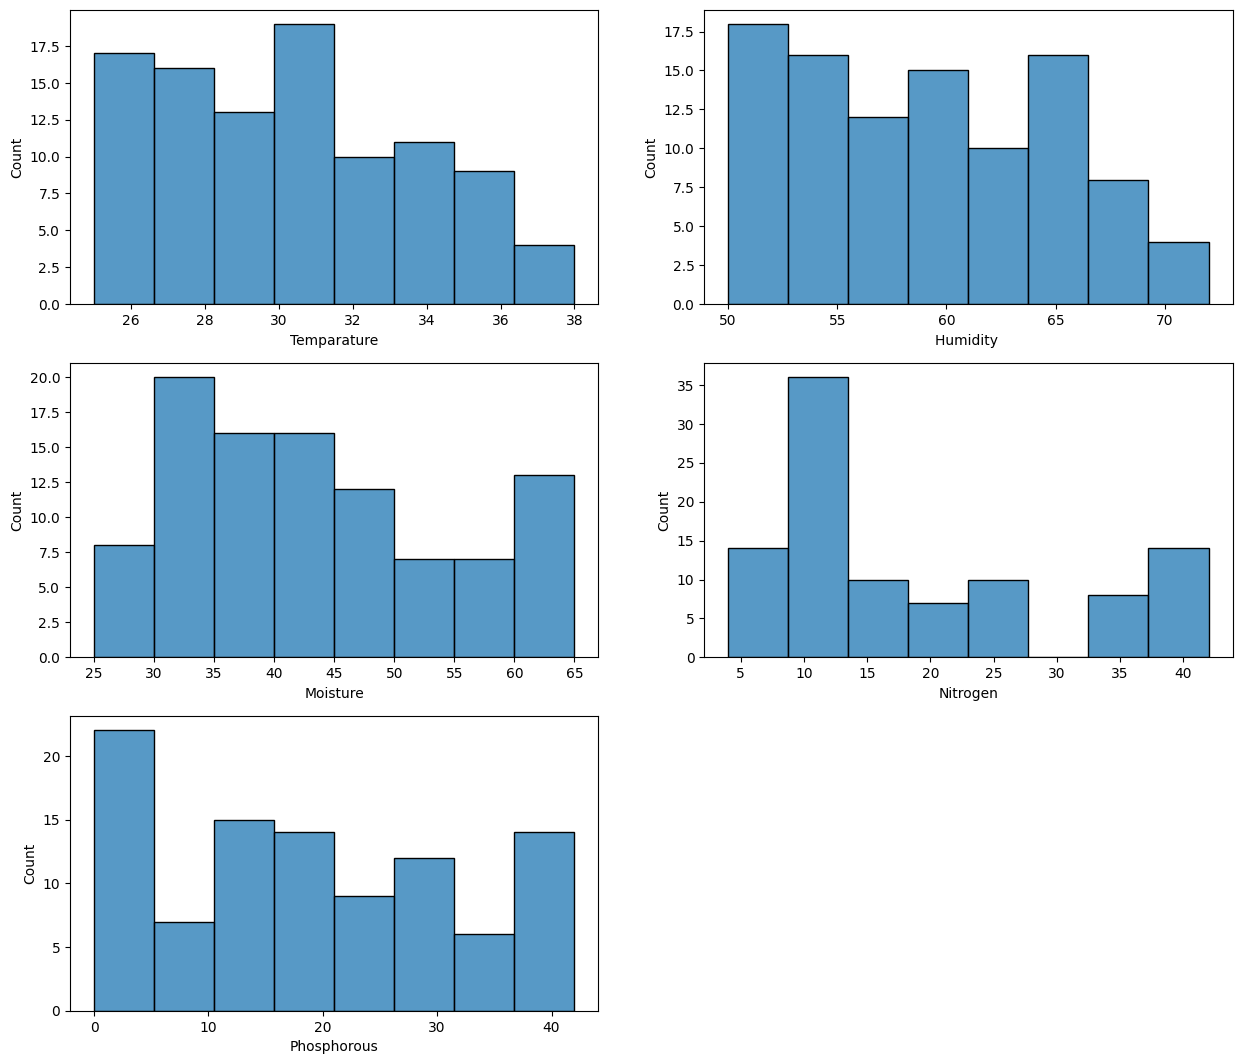

In [7]:
plt.figure(figsize=(15,13))
i = 1
for column in Numeric_column:
    plt.subplot(3,2,i)
    sns.histplot(df[column])
    i+=1
plt.show()


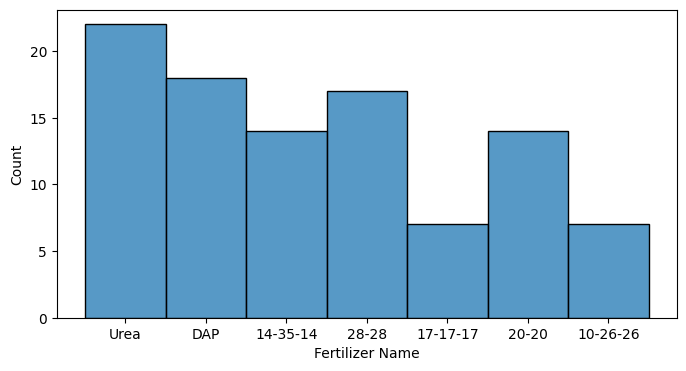

In [8]:
plt.figure(figsize=(8,4))
sns.histplot(df["Fertilizer Name"])
plt.show()

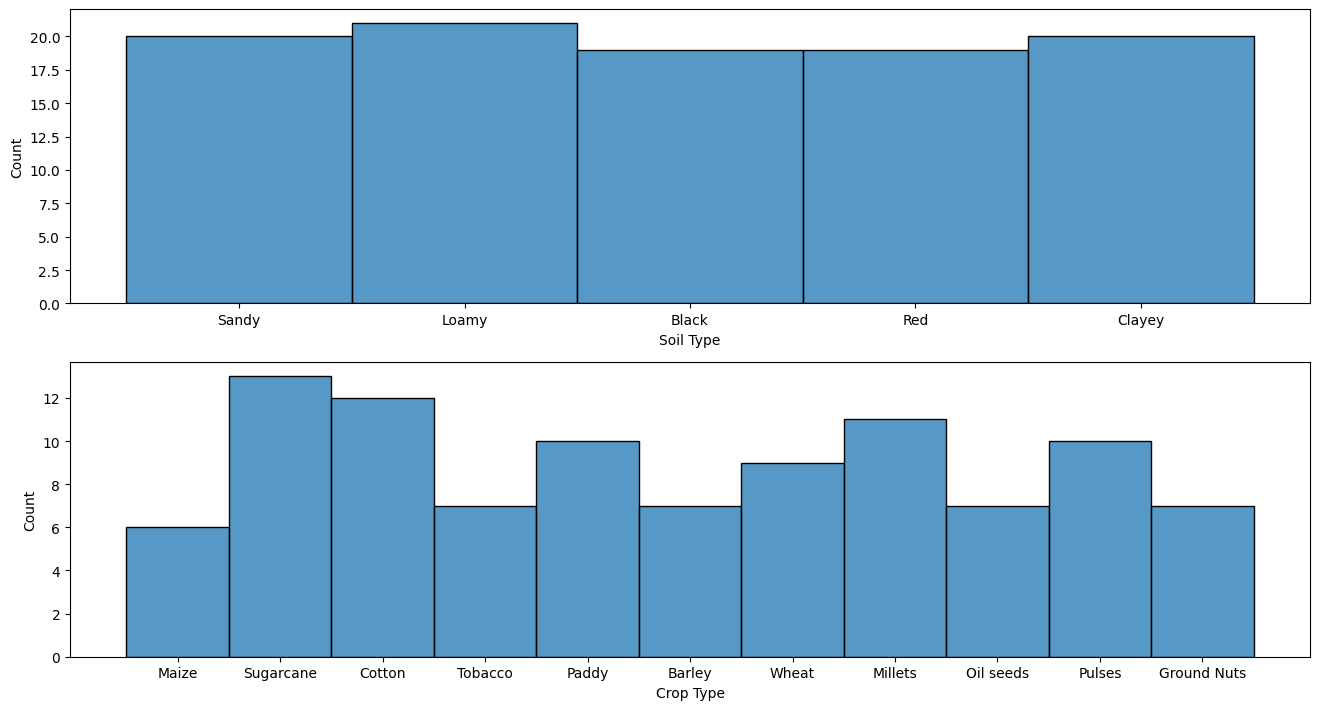

In [9]:
plt.figure(figsize=(16,13))
i = 1
for column in Catagorical_column:
    plt.subplot(3,1,i)
    sns.histplot(df[column])
    i+=1
plt.show()

##convet Categorical Value To Numerical Value

In [10]:
crop_type_label_encoder = LabelEncoder()
df["Crop Type"] = crop_type_label_encoder.fit_transform(df["Crop Type"])
croptype_dict = {}
for i in range(len(df["Crop Type"].unique())):
    croptype_dict[i] = crop_type_label_encoder.inverse_transform([i])[0]
print(croptype_dict)

{0: 'Barley', 1: 'Cotton', 2: 'Ground Nuts', 3: 'Maize', 4: 'Millets', 5: 'Oil seeds', 6: 'Paddy', 7: 'Pulses', 8: 'Sugarcane', 9: 'Tobacco', 10: 'Wheat'}


In [11]:
soil_type_label_encoder = LabelEncoder()
df["Soil Type"] = soil_type_label_encoder.fit_transform(df["Soil Type"])
soiltype_dict = {}
for i in range(len(df["Soil Type"].unique())):
    soiltype_dict[i] = soil_type_label_encoder.inverse_transform([i])[0]
print(soiltype_dict)

{0: 'Black', 1: 'Clayey', 2: 'Loamy', 3: 'Red', 4: 'Sandy'}


In [12]:
fertname_label_encoder = LabelEncoder()
df["Fertilizer Name"] = fertname_label_encoder.fit_transform(df["Fertilizer Name"])
fertname_dict = {}
for i in range(len(df["Fertilizer Name"].unique())):
    fertname_dict[i] = fertname_label_encoder.inverse_transform([i])[0]
print(fertname_dict)

{0: '10-26-26', 1: '14-35-14', 2: '17-17-17', 3: '20-20', 4: '28-28', 5: 'DAP', 6: 'Urea'}


In [13]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


##Barplot Between Crop Type and Other Attribute

<Axes: xlabel='Crop Type', ylabel='Phosphorous'>

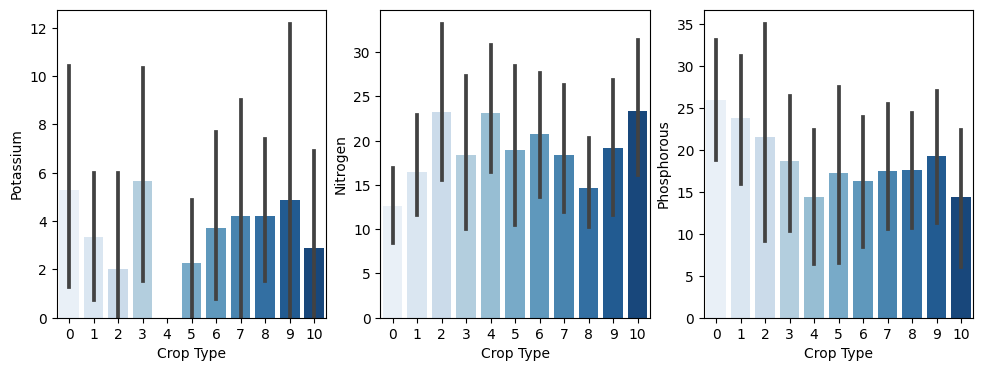

In [14]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.barplot(x='Crop Type',y='Potassium',data=df,palette='Blues')
plt.subplot(1,4,2)
sns.barplot(y='Nitrogen',x='Crop Type',data=df,palette='Blues')
plt.subplot(1,4,3)
sns.barplot(x='Crop Type',y='Phosphorous',data=df,palette='Blues')



<Axes: xlabel='Crop Type', ylabel='Moisture'>

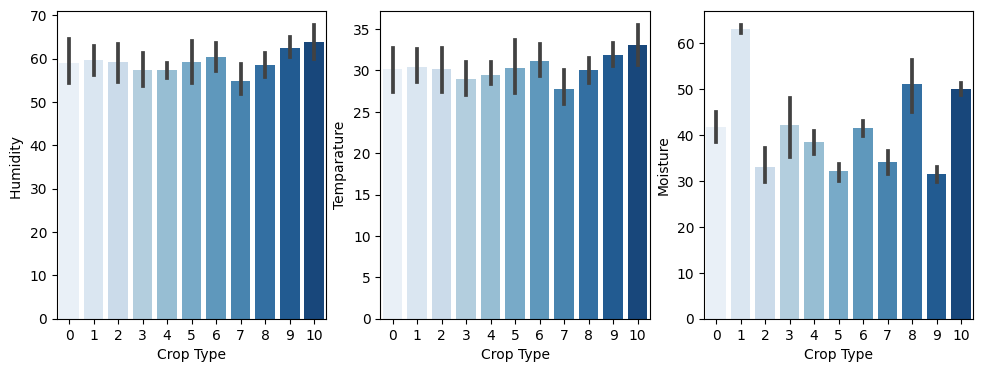

In [17]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.barplot(x='Crop Type',y='Humidity ',data=df,palette='Blues')
plt.subplot(1,4,2)
sns.barplot(x='Crop Type',y='Temparature',data=df,palette='Blues')
plt.subplot(1,4,3)
sns.barplot(x='Crop Type',y='Moisture',data=df,palette='Blues')

##Heat Map Of Correlation Matrix Of Columns

<Axes: >

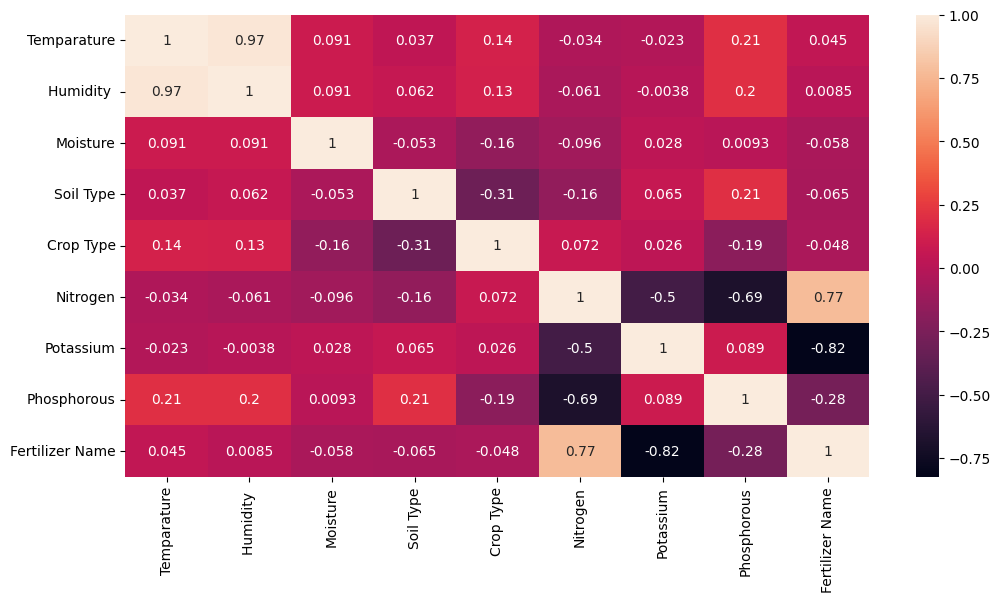

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

##Train -Test Data Split

In [ ]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(79, 8)
(20, 8)


##Train KNN With Training Data Set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

##Accuracy Score Of KNN On Test Data and Confusion Matrix

In [ ]:
y_pred_knn=knn.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_knn)

0.8

<Axes: >

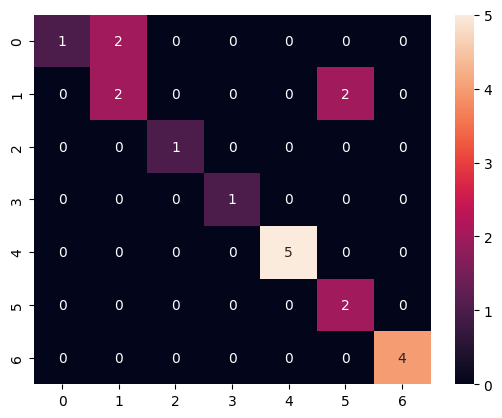

In [ ]:
cm=confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cm,annot=True,fmt='g')

##Train Decision Tree Model 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

##Accuracy Score Of Decision Tree Model on Test Data and Confusion Matrix

In [ ]:
y_pred_DT=model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_DT)

0.9

<Axes: >

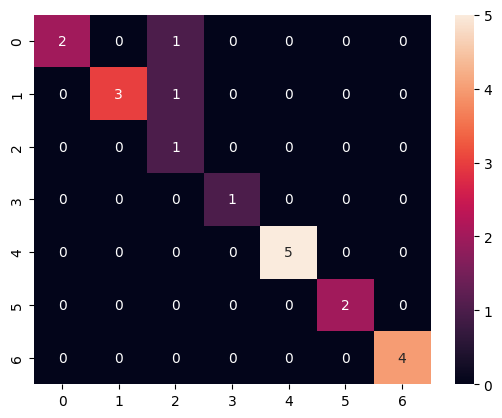

In [ ]:
cm=confusion_matrix(y_test,y_pred_DT)
sns.heatmap(cm,annot=True,fmt='g')

**Result**: We can use decision Tree model to predict Fertilizer name 